### Stock Market Prediction And Forecasting Using Stacked LSTM-stock price_forcasting

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [56]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Data Collection
#!pip install pandas-datareader
import pandas_datareader as pdr
key=""

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
df.to_csv('AAPL.csv')

In [7]:
data=pd.read_csv('AAPL.csv')

In [8]:
print(data.shape)
data.head()

(1257, 14)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-03-15 00:00:00+00:00,178.65,180.24,178.07,178.50,22584565,42.520056,42.898489,42.382012,42.484355,90338260,0.0,1.0
1,AAPL,2018-03-16 00:00:00+00:00,178.02,179.12,177.62,178.65,36836456,42.370112,42.631920,42.274909,42.520056,147345824,0.0,1.0
2,AAPL,2018-03-19 00:00:00+00:00,175.30,177.47,173.66,177.32,32804695,41.722731,42.239207,41.332399,42.203506,131218780,0.0,1.0
3,AAPL,2018-03-20 00:00:00+00:00,175.24,176.80,174.94,175.24,19314039,41.708451,42.079742,41.637048,41.708451,77256156,0.0,1.0
4,AAPL,2018-03-21 00:00:00+00:00,171.27,175.09,171.26,175.04,35247358,40.763560,41.672749,40.761180,41.660849,140989432,0.0,1.0


In [12]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-03-07 00:00:00+00:00,151.60,154.0299,151.1300,153.700,56182028,151.60,154.0299,151.1300,153.700,56182028,0.0,1.0
1253,AAPL,2023-03-08 00:00:00+00:00,152.87,153.4700,151.8300,152.810,47204791,152.87,153.4700,151.8300,152.810,47204791,0.0,1.0
1254,AAPL,2023-03-09 00:00:00+00:00,150.59,154.5350,150.2250,153.559,53833582,150.59,154.5350,150.2250,153.559,53833582,0.0,1.0
1255,AAPL,2023-03-10 00:00:00+00:00,148.50,150.9400,147.6096,150.210,68572400,148.50,150.9400,147.6096,150.210,68572400,0.0,1.0
1256,AAPL,2023-03-13 00:00:00+00:00,150.47,153.1400,147.7000,147.805,84457122,150.47,153.1400,147.7000,147.805,84457122,0.0,1.0


In [13]:
df1=data.reset_index()['close']

In [14]:
df1

0       178.65
1       178.02
2       175.30
3       175.24
4       171.27
         ...  
1252    151.60
1253    152.87
1254    150.59
1255    148.50
1256    150.47
Name: close, Length: 1257, dtype: float64

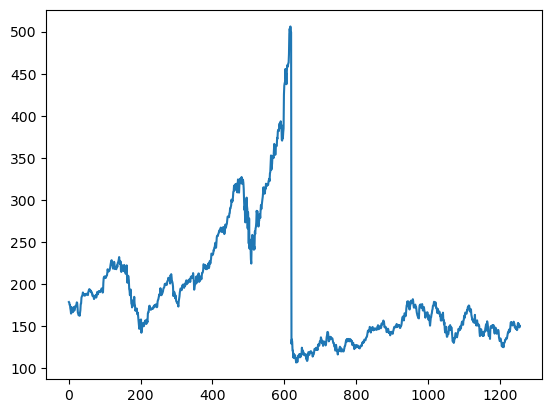

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.17986224]
 [0.17828428]
 [0.17147151]
 ...
 [0.10958046]
 [0.10434565]
 [0.1092799 ]]


In [17]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(817, 440)

In [19]:
train_data

array([[1.79862242e-01],
       [1.78284283e-01],
       [1.71471509e-01],
       [1.71321227e-01],
       [1.61377583e-01],
       [1.55316218e-01],
       [1.45522855e-01],
       [1.65134627e-01],
       [1.54038823e-01],
       [1.49380088e-01],
       [1.52636193e-01],
       [1.49881027e-01],
       [1.54164058e-01],
       [1.62229180e-01],
       [1.65209768e-01],
       [1.54139011e-01],
       [1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],
       [1.98396994e-01],
       [2.01678147e-01],
       [2.08390733e-01],


In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
import numpy
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
#Train the model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


In [27]:
#compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=34,verbose=1)

Epoch 1/50
22/22 [==============================] - 11s 214ms/step - loss: 0.0223 - val_loss: 0.0015
Epoch 2/50
22/22 [==============================] - 3s 124ms/step - loss: 0.0096 - val_loss: 0.0015
Epoch 3/50
22/22 [==============================] - 3s 134ms/step - loss: 0.0082 - val_loss: 7.8403e-04
Epoch 4/50
22/22 [==============================] - 3s 149ms/step - loss: 0.0106 - val_loss: 0.0012
Epoch 5/50
22/22 [==============================] - 3s 135ms/step - loss: 0.0062 - val_loss: 4.4222e-04
Epoch 6/50
22/22 [==============================] - 3s 152ms/step - loss: 0.0058 - val_loss: 3.5153e-04
Epoch 7/50
22/22 [==============================] - 3s 139ms/step - loss: 0.0047 - val_loss: 4.1852e-04
Epoch 8/50
22/22 [==============================] - 3s 134ms/step - loss: 0.0041 - val_loss: 4.1915e-04
Epoch 9/50
22/22 [==============================] - 3s 149ms/step - loss: 0.0046 - val_loss: 5.3521e-04
Epoch 10/50
22/22 [==============================] - 4s 192ms/step - loss: 

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 31ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.65537458322606

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

151.51218755783955

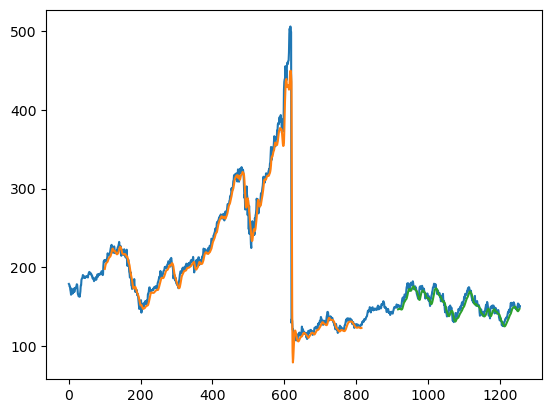

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.1016

In [51]:
day_new=np.arange(1,100)
day_pred=np.arange(101,131)

In [49]:
len(df1)

1257

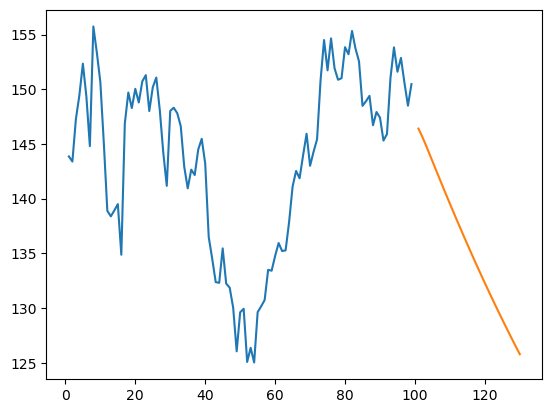

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

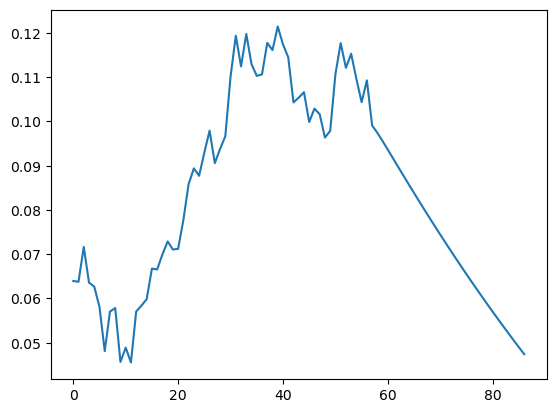

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

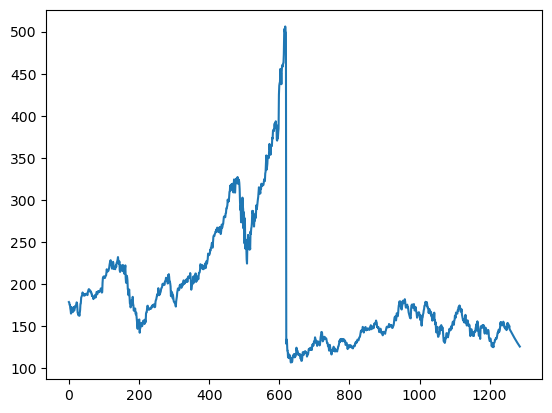

In [55]:
plt.plot(df3)